# Polynomial Linear Regression

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

### Simple Polynomial (there is only one input, x...)

In [45]:
# creating a polynomial dataset
x = 6 * np.random.rand(200, 1) - 3
y = 0.8 *x** 2 + 0.9*x + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

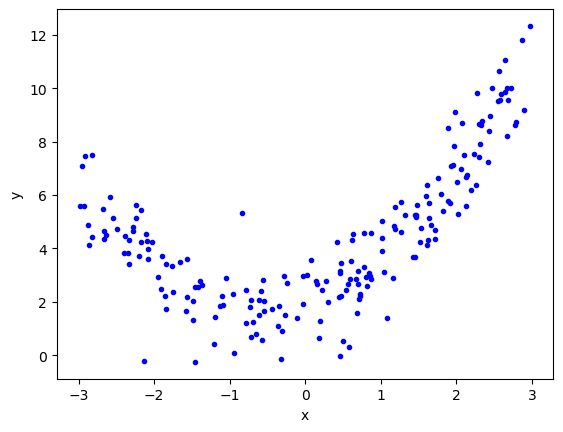

In [46]:
# plotting the dataset
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## When Linear Regression is applied

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

LinearRegression()

In [50]:
# predict and calculate the accuracy
y_pred  = lr.predict(x_test)
r2_score(y_test, y_pred)
# damn that's a low score!!

0.3296252647590978

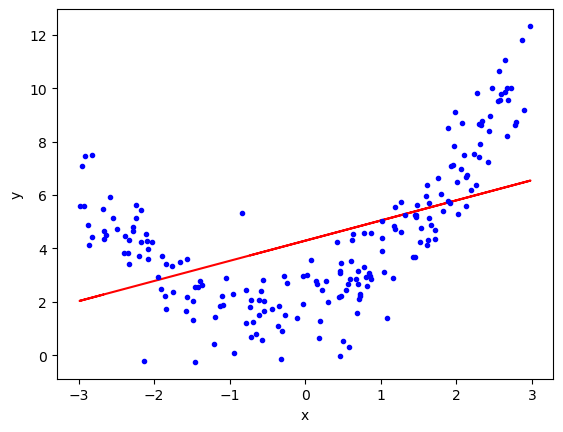

In [51]:
# plotting the Linear Regression fitted line
plt.plot(x_train, lr.predict(x_train), color='r')
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## When Polynomial Linear Regression is applied

In [52]:
# we are using the degree = 2
# include bias = True means we will get the x^0 term when x is transformed
poly = PolynomialFeatures(degree=2, include_bias=True)

# this will calculate the x^0, x^1 and x^2 for the input parameter
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [53]:
# this is just the input parameter
print(x_train[0])
# this is input paramters with degrees 0, 1, 2
print(x_train_trans[0])

[-0.72380776]
[ 1.         -0.72380776  0.52389768]


In [54]:
# now use Linear Regression on this dataset
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(x_test_trans)

In [56]:
r2_score(y_test, y_pred)
# may i say this is better than i had expected

0.8650432040183591

In [57]:
print(lr.coef_)
print(lr.intercept_)
# these values are pretty colse to our asssumed equation!!

[[0.         0.88953838 0.76754771]]
[2.00486914]


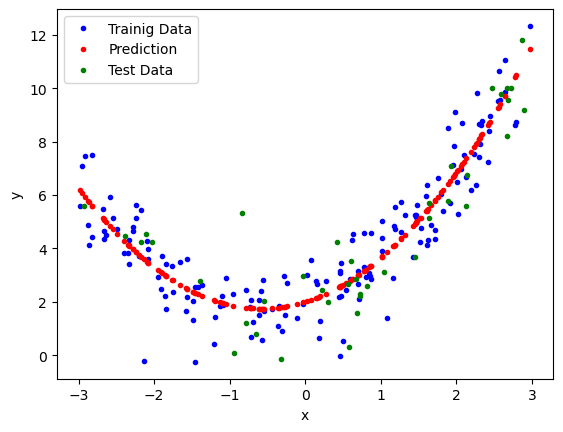

In [58]:
plt.plot(x_train, y_train, 'b.', label='Trainig Data')
plt.plot(x_train, lr.predict(x_train_trans), 'r.', label='Prediction')
plt.plot(x_test, y_test, 'g.', label='Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Degree of Fit - Hyper Parameter

In [59]:
# function that takes the degree - input and plots the fitted line from the model
def polynomial_regression(degree):
    # new random input data
    x_new = np.linspace(-3, 3, 100).reshape(100, 1)

    ploybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    #create a pipeline
    polynomial_regression = Pipeline([
        ('poly_features', ploybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    # train the model
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    # plot the graph
    plt.plot(x_new, y_newbig, 'r', label='Degree' + str(degree), linewidth=2)
    plt.plot(x_train, y_train, 'b.', label='Train', linewidth=3)
    plt.plot(x_test, y_test, 'g.', label='Test', linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([-3, 3, 0, 10])
    plt.show()

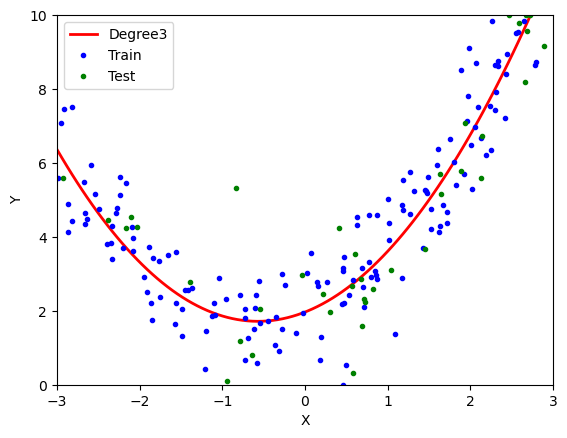

In [60]:
polynomial_regression(3)
# with the degree 3 there is not much difference

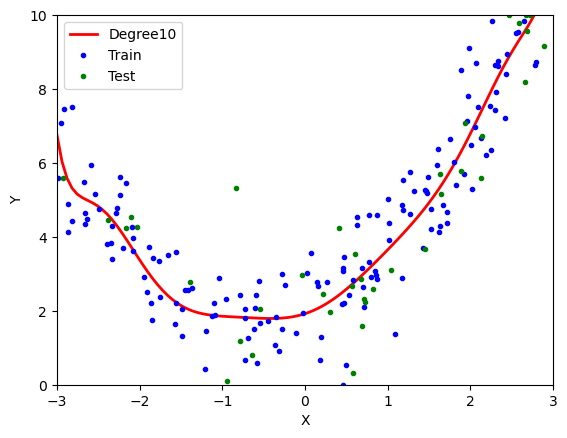

In [61]:
polynomial_regression(10)
# we see some irregular behavior

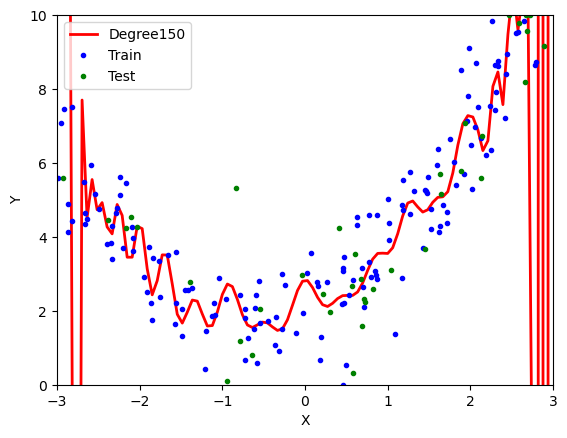

In [62]:
polynomial_regression(150)
# now this is very overfitted curve!!

### Multiple Polynomial Regression (More than one input...)

In [65]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

# consider the equation with two inputs
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y +0.1xy + 2

In [67]:
import plotly.express as px

# since we have two inputs the graph is gonna be 3D
# we will use plotly for this purpose
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [69]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T
z_final = lr.predict(final).reshape(10, 10)

In [70]:
# plot the graph
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()

In [71]:
x_multi = np.array([x, y]).reshape(100, 2)
x_multi.shape

(100, 2)

In [73]:
poly = PolynomialFeatures(degree=30)
x_multi_trans = poly.fit_transform(x_multi)

In [77]:
# print("Input", poly.n_input_features_)
print('Output', poly.n_output_features_)
print('Powers\n', poly.powers_)

Output 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]


In [78]:
x_multi_trans.shape

(100, 496)

In [80]:
lr = LinearRegression()
lr.fit(x_multi_trans, z)

LinearRegression()

In [81]:
x_test_multi = poly.transform(final)

In [82]:
z_final = lr.predict(x_multi_trans).reshape(10, 10)

In [85]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene=dict(zaxis = dict(range=[0, 35])))
fig.show()